# KNN
K Nearest Neighbors is a classification algorithm which uses cartesian distance to classify between points. It first plots all the existing data in n-dimensional plane (n here represents number of features). When a new point is to be classified, it plots it and calculates its distance from every single point. Then the n nearest points to it determine its class meaning the class with majority is assigned to the new point.

In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

In [3]:
label_encoder = OrdinalEncoder()
new_iris = label_encoder.fit_transform(iris)
columns = label_encoder.get_feature_names_out()
new_iris = pd.DataFrame(new_iris, columns=columns)
new_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,8.0,14.0,4.0,1.0,0.0
1,6.0,9.0,4.0,1.0,0.0
2,4.0,11.0,3.0,1.0,0.0
3,3.0,10.0,5.0,1.0,0.0
4,7.0,15.0,4.0,1.0,0.0
...,...,...,...,...,...
145,24.0,9.0,28.0,19.0,2.0
146,20.0,4.0,26.0,15.0,2.0
147,22.0,9.0,28.0,16.0,2.0
148,19.0,13.0,30.0,19.0,2.0


In [4]:
X = new_iris.iloc[:, :-1]
y = new_iris.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = knn.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

1.0

# K Means Clustering
This is a unsupervised clustering algorithm. Just like KNN it plots the data in nd plane but unlike knn it does not have any label. We find the classes ourselves by creating clusters. We take n number of clusters which would be our number of classes. We then take a data point and assign it as centroid number 1 and do this till every cluster has a center. We then take a new point and calculate distance from each centroids and assign it to the cluster having least distance. We then have to recalculate the centroid, we do this by taking average of the two points in each axis. We then do it for all points until each point is assigned to a cluster. This is the end of our first iteration. We then recalculate the centroids from each points to better our performance.

In [10]:
iris = X.iloc[:, 2:]
pl = iris.iloc[:, 0]
pw = iris.iloc[:, 1]

In [11]:
iris.head()

,petal_length,petal_width
0,4.0,1.0
1,4.0,1.0
2,3.0,1.0
3,5.0,1.0
4,4.0,1.0


<Axes: xlabel='petal_length', ylabel='petal_width'>

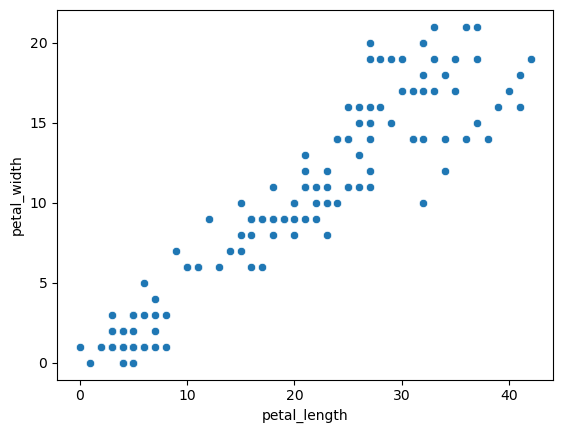

In [12]:
sns.scatterplot(x=pl, y=pw)

In [13]:
kmeans = KMeans(n_clusters=3)

In [14]:
kmeans.fit(iris)

KMeans(n_clusters=3)

In [15]:
y_means = kmeans.predict(iris)

<Axes: xlabel='petal_length', ylabel='petal_width'>

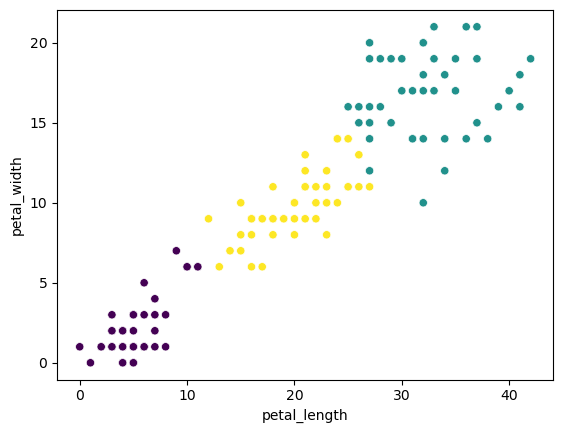

In [16]:
sns.scatterplot(x=pl, y=pw, c=y_means)

We here have 3 centeroids which help us in classifying the data.

# SVM
Support Vector Machine creates multiple hyperplanes which divide and classify the data but chooses the hyperplane which has the maximum width by using support vectors.